# Support Vector Machines 

## Contexto:

Meu objetivo aqui é criar um modelo de machine learning, a partir do dataset fornecido, que seja capaz de determinar se um vinho "é falso/adulterado" (adulterado, por exemplo, com adição de sucos ou adoçantes) ou original.

*Crédito aos autores: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---
---
## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dados

In [2]:
df = pd.read_csv("wine.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

## Exploração dos dados

**Quantidade de Legit vs Fraud:**

<AxesSubplot:xlabel='quality', ylabel='count'>

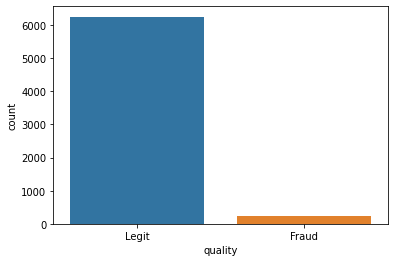

In [6]:
# plt.figure(figsize=(4,3), dpi=200)
sns.countplot(x='quality', data=df)

**Analisando se existe 'grande diferença' se analisarmos por vinhos red vs white.**

<AxesSubplot:xlabel='quality', ylabel='count'>

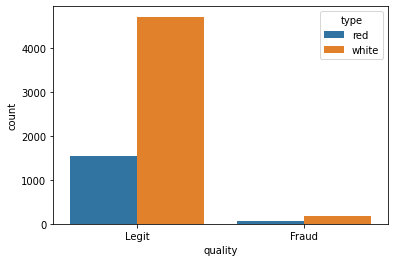

In [7]:
sns.countplot(x='quality', data=df, hue='type')

**Qual a porcentagem dos vinhos são fraudes? Separado por red e white:**

In [8]:
reds = df[df["type"]=='red']
whites = df[df["type"]=='white']

In [9]:
print("Percentage of fraud in Red Wines:")
print(100* (len(reds[reds['quality']=='Fraud'])/len(reds)))

Percentage of fraud in Red Wines:
3.9399624765478425


In [10]:
print("Percentage of fraud in White Wines:")
print(100* (len(whites[whites['quality']=='Fraud'])/len(whites)))

Percentage of fraud in White Wines:
3.7362188648427925


**Calculando correlação das variáveis com a coluna 'quality' (que é a coluna que indica se o vinho é 'legítimo' ou 'fraude'). Vou fazer um map setando legit -> 0 e fraud -> 1.**

In [11]:
df['Fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

In [12]:
df.corr()['Fraud']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**Correlação com vinhos fraudulentos:**

<AxesSubplot:>

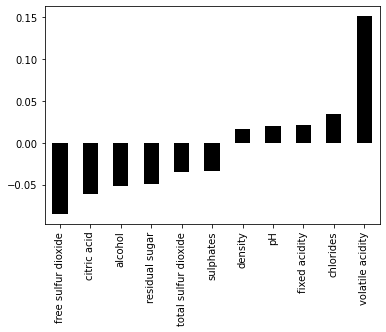

In [13]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar', color='k')

**Clustermap com relação entre vas variáveis:**

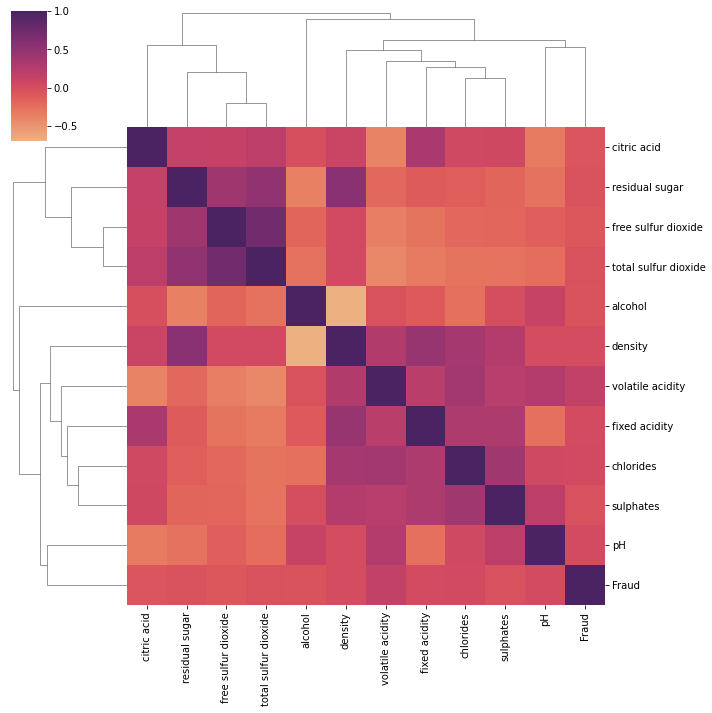

In [14]:
sns.clustermap(df.corr(), cmap='flare')

----
----

# Machine Learning

## Train | Test Split and Scaling

In [15]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)
df = df.drop('Fraud', axis=1)

In [16]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,1


In [18]:
X = df.drop('quality', axis=1)
y = df['quality']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Criando instância Support Vector Machine. Ajusto os pesos com "class_weight='balanced'", pois os dados estão desbalanceados.**

*Para detalhes sobre os argumentos possíveis de SVC, clickar na documentação [AQUI](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).*

In [24]:
from sklearn.svm import SVC

In [25]:
svc = SVC(class_weight='balanced')

**Usando o GridSearchCV para determinar os melhores valores para os parâmetros C e gamma:**

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1], 'gamma':['scale', 'auto']}
grid = GridSearchCV(svc, param_grid)

In [31]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [32]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

**Matriz de confusão e e report do modelo:**

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [34]:
grid_pred = grid.predict(scaled_X_test)

In [35]:
confusion_matrix(y_test, grid_pred)

array([[ 17,  10],
       [ 92, 531]])

/home/madruga/Documents/Python/portfolio_nb/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


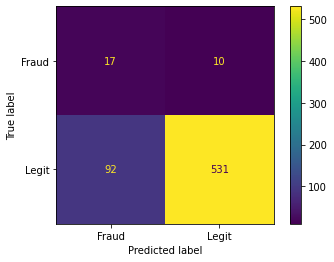

In [36]:
plot_confusion_matrix(grid, scaled_X_test, y_test)

In [37]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



### Observação:

Obtive PRECISION FRAUD = 0.16. Nada bom. Isso me diz que o modelo não é bom em detectar vinhos fraudulentos.

Conclusões que eu tiro disso:

1. Utilizei SVM, mas outros modelos poderiam ser implementados para efeitos de comparação. Não acho que seja um problema do modelo em questão.
2. Penso ser um problema, sim, da análise química. Me parece que a química de vinhos fraudulentos "é muito próxima" da química de bons vinhos.
3. Talvez, se tivéssemos parâmetros adicionais, nosso modelo teria performado melhor.